In [4]:
import tensorflow_addons as tfa
from utils.explanations import integrated_gradients
from keras.utils import CustomObjectScope
import tensorflow.keras as keras
import tensorflow as tf
import os
from utils.explanations import minmax_norm
from utils.explanations import calculate_ig_attributions
from utils.utils import read_dataset
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt

archive = 'ucr'
dataset_name = 'Beef'
data_p = 'G:/Meine Ablage/master thesis/code/xai-tsc'
dataset = 'Beef'
model_type ='resnet'
ylen = 1
data = read_dataset(data_p, archive, dataset, 'original', ylen)[dataset]
ylen = len(data[0][0])
ig_data_stl  = read_dataset(data_p, archive, dataset, f'{model_type}_ig_norm', ylen)[dataset]
dataset = 'Beef'
itr = 0
#./results/ucr/Beef/experiment_2/resnet/resnet_mt_ae_0.25/resnet_ig_trf/best_model.hdf5
#results\ucr\Beef\experiment_2\resnet\resnet_mt_ae_0.25_0\resnet_ig_trf\df_best_model.csv
ig_link = f'./results/ucr/{dataset}/experiment_1/resnet/resnet_mt_ae_{itr}/resnet_ig_norm/best_model.hdf5'
#f'./results/ucr/{dataset}/experiment_2/resnet/resnet_mt_ae_0.25_{itr}/resnet_ig_raw/best_model.hdf5'
ig_model = keras.models.load_model(ig_link ,compile=False)

In [5]:
%matplotlib inline

for ts in range(len(ig_data_stl[1])): 
    print(ts)
    train_att = ig_data_stl[1] 
    sorted_vals = np.argsort(train_att[ts])
    xvals = ig_data_stl[1][ts]
    count = 230
    ytrue  = data[1][ts]

    pred_label = np.argmax(ig_model.predict(ig_data_stl[0])[0][ts])
    #print(xvals)
    sup_array = []
    print(pred_label,ytrue[0]-1,ytrue[0]-1 == int(pred_label),ytrue[0])
    if ytrue[0] == int(pred_label)+1 and ytrue[0]==2: 
        for idx in range(0, len(sorted_vals), 2):
            print("Y")
            sup_x  = xvals.copy()
            #print(sorted_vals[:idx])
            #print(sorted_vals[:idx])
            sup_x[sorted_vals[:idx]] = 0
            sup_array.append(sup_x)
            #sup_x[sorted_vals[:idx]] = np.nan 
            # Indices of non-NaN values
            #not_nan_indices = np.arange(len(sup_x))[~np.isnan(sup_x)]
            # Linearly interpolate NaN values
            #interpolated_array = np.interp(np.arange(len(sup_x)), not_nan_indices, sup_x[not_nan_indices])
            #sup_array.append(interpolated_array)


        sup_array = np.array(sup_array)
        pred = ig_model.predict(sup_array)
        print(pred_label)
        #print(sup_array[50])
        #plt.plot(sup_array[140])
        #plt.plot(pred[0][:,pred_label])
    plt.show()



0
1/1 [==============================] - 1s 1s/step
1 0.0 False 1.0
1
1/1 [==============================] - 0s 109ms/step
3 0.0 False 1.0
2
1/1 [==============================] - 0s 105ms/step
1 0.0 False 1.0
3
1/1 [==============================] - 0s 120ms/step
3 0.0 False 1.0
4
1/1 [==============================] - 0s 112ms/step
3 0.0 False 1.0
5
1/1 [==============================] - 0s 115ms/step
1 0.0 False 1.0
6
1/1 [==============================] - 0s 111ms/step
1 1.0 True 2.0
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
8/8 [==============================] 

In [6]:
train_att = ig_data_stl[1] 
ts = 20
sorted_vals = np.argsort(train_att[ts])
xvals = ig_data_stl[0][ts]
count = 230
ytrue  = data[1][ts]
pred_label = np.argmax(ig_model.predict(ig_data_stl[0])[0][ts])
#print(xvals)
sup_array = []
for idx in range(0, len(sorted_vals), 2):
    sup_x  = xvals.copy()
    #print(sorted_vals[:idx])
    #print(sorted_vals[:idx])
    sup_x[sorted_vals[:idx]] = np.nan 
    # Indices of non-NaN values
    not_nan_indices = np.arange(len(sup_x))[~np.isnan(sup_x)]
    # Linearly interpolate NaN values
    interpolated_array = np.interp(np.arange(len(sup_x)), not_nan_indices, sup_x[not_nan_indices])
    sup_array.append(interpolated_array)


sup_array = np.array(sup_array)
pred = ig_model.predict(sup_array)
#print(sup_array[50])
#plt.plot(sup_array[140])
print(pred_label)

#plt.plot(pred[:,pred_label])
#plt.show()


8/8 [==============================] - 1s 88ms/step
1


15/15 [==============================] - 1s 97ms/step


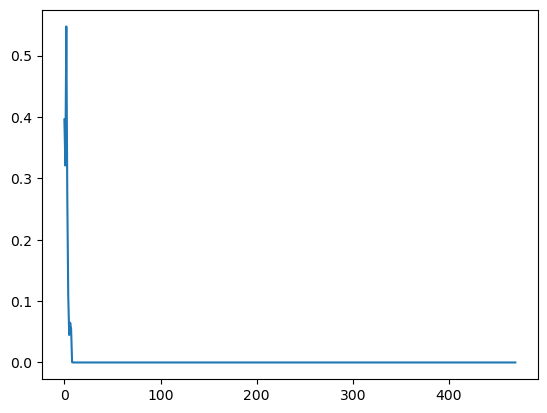

In [9]:

train_att = ig_data_stl[1] 
ts = 2
xvals = ig_data_stl[0][ts]
ytrue  = data[1][ts]
pred_label = np.argmax(ig_model.predict(ig_data_stl[0])[0][ts])
sorted_values = np.sort(xvals)[::-1]
baseline = np.zeros(470)
helper_array = []
for idx in range(0, len(sorted_vals), 1):
    baseline[idx] = sorted_vals[idx]
    helper_array.append(baseline.copy())


add_att = ig_model.predict(np.array(helper_array))[0][:,pred_label]
#[:,pred_label]

plt.plot(add_att)

In [ ]:
"""
supp_x_vals_pred = []
for xv, pa in zip(x,p[1]):
    pa = pa.flatten()
    supp_x  = xv.copy()
    sorted = replace#(np.argsort(pa)[::-1][int(len(pa)*keep):])
    supp_x[sorted] = 0 #supp_strat[sorted]
    supp_x_vals_pred.append(supp_x)
"""

# Run Prediction Flips

In [128]:
from utils.utils import read_dataset
from utils.explanations import calculate_ig_attributions
from  tensorflow import keras
import numpy as np

archive = 'ucr'
data_p = 'G:/Meine Ablage/master thesis/code/xai-tsc'
model = "resnet_mt_nn_iter"
model_type = "resnet"
dataset = "GunPoint"
experiment = "experiment_4"

itr = 1
ig_flips = []
pred_flips = []
rand_flips = []
gamma = 0.5


original_data = read_dataset(data_p, archive, dataset, 'original', 1)[dataset]
x_train, y_train, x_test,y_test = original_data

new_data =  y_test.flatten().copy()
if dataset == 'ECG200':
    new_data[new_data==-1] = 0
    new_data[new_data==2] = 1
    print("new",new_data)
else: # GunPoint # ECG5000
    new_data -= 1

ogd = new_data



ig_attributions = calculate_ig_attributions(data_p, archive, f"{model}_{gamma}_{itr}", dataset, f"{model_type}_ig_norm", task=1, experiment=4)
ig_link  = f'./results/ucr/{dataset}/{experiment}/{model_type}/{model}_{gamma}_{itr}/resnet_ig_norm/last_model.hdf5'
#f'./results/ucr/{dataset}/experiment_1/fcn/fcn_{itr}/original/
#cam_model =keras.models.load_model(cam_link ,compile=False)
loaded_model = keras.models.load_model(ig_link ,compile=False)


for delete_rate in ([1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0][::-1]): 
    print(delete_rate)
    explanations = []
    for a in range(2): 
        attr =  ig_attributions[a]
        sup_array = []
        for ts in range(len(attr)):
            sorted_vals = np.argsort(attr[ts][2])[::-1][:int(len(attr[ts][2])*delete_rate)]
            sup_x  = attr[ts][1].copy()
            #print(sorted_vals[:idx])
            #print(sorted_vals[:idx])
            sup_x[sorted_vals] = 0 
            #print(sup_x)
            # Indices of non-NaN values
            #not_nan_indices = np.arange(len(sup_x))[~np.isnan(sup_x)]
            # Linearly interpolate NaN values
            #interpolated_array = np.interp(np.arange(len(sup_x)), not_nan_indices, sup_x[not_nan_indices])
            sup_array.append([attr[ts][0],attr[ts][1],sup_x])
        explanations.append(sup_array)

    vals = [supr[2] for supr in explanations[1]]  

    results1 = np.array([np.argmax(pr) for pr in loaded_model.predict(np.array(vals))[0]]).flatten()
    ig_flips.append(list(ogd.flatten()==results1).count(False))

    explanations = []
    for xval in [x_train,x_test]: 
        attr = loaded_model.predict(xval)[1] 
        #ig_attributions[a]
        sup_array = []
        for ts in range(len(attr)):
            sorted_vals = np.argsort(attr[ts].flatten())[::-1][:int(len(attr[ts].flatten())*delete_rate)]
            sup_x  = xval[ts].flatten().copy()
            #print(sorted_vals[:idx])
            #print(sorted_vals[:idx])
            sup_x[sorted_vals] = 0 
            # Indices of non-NaN values
            #not_nan_indices = np.arange(len(sup_x))[~np.isnan(sup_x)]
            # Linearly interpolate NaN values
            #interpolated_array = np.interp(np.arange(len(sup_x)), not_nan_indices, sup_x[not_nan_indices])
            sup_array.append([0,0,sup_x])
        explanations.append(sup_array)


    vals = [supr[2] for supr in explanations[1]]  
    results2 = np.array([np.argmax(pr) for pr in loaded_model.predict(np.array(vals))[0]]).flatten()
    pred_flips.append(list(ogd.flatten()==results2).count(False))


    explanations = []
    for xval in [x_train,x_test]: 
        attr = loaded_model.predict(xval)[1] 
        #ig_attributions[a]
        sup_array = []
        for ts in range(len(attr)):
            sorted_vals = np.argsort(attr[ts].flatten())[:int(len(attr[ts].flatten())*delete_rate)]
            sup_x  = xval[ts].flatten().copy()
            #print(sorted_vals[:idx])
            #print(sorted_vals[:idx])
            sup_x[sorted_vals] = 0 
            # Indices of non-NaN values
            #not_nan_indices = np.arange(len(sup_x))[~np.isnan(sup_x)]
            # Linearly interpolate NaN values
            #interpolated_array = np.interp(np.arange(len(sup_x)), not_nan_indices, sup_x[not_nan_indices])
            sup_array.append([0,0,sup_x])
        explanations.append(sup_array)


    vals = [supr[2] for supr in explanations[1]]  
    results3 = np.array([np.argmax(pr) for pr in loaded_model.predict(np.array(vals))[0]]).flatten()
    rand_flips.append(list(ogd.flatten()==results3).count(False))





G:/Meine Ablage/master thesis/code/xai-tsc/results/ucr/GunPoint//experiment_4/resnet/resnet_mt_nn_iter_0.5_1/resnet_ig_norm/best_model.hdf5
5/5 [==============================] - 0s 19ms/step
0
5/5 [==============================] - 0s 19ms/step
0.1
5/5 [==============================] - 0s 19ms/step
0.2
5/5 [==============================] - 0s 19ms/step
0.3
5/5 [==============================] - 0s 19ms/step
0.4
5/5 [==============================] - 0s 19ms/step
0.5
5/5 [==============================] - 0s 19ms/step
0.6
5/5 [==============================] - 0s 19ms/step
0.7
5/5 [==============================] - 0s 19ms/step
0.8
5/5 [==============================] - 0s 20ms/step
0.9
5/5 [==============================] - 0s 20ms/step
1
5/5 [==============================] - 0s 19ms/step


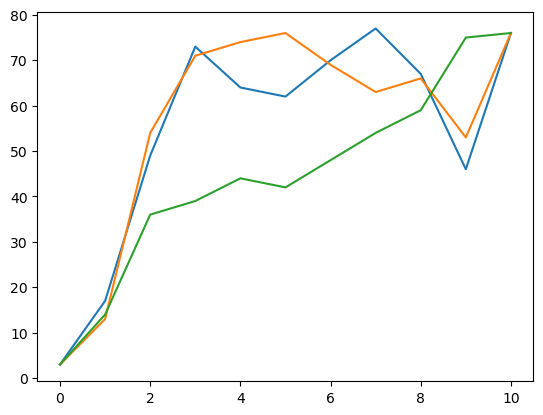

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ig_flips)
plt.plot(pred_flips)
plt.plot(rand_flips)

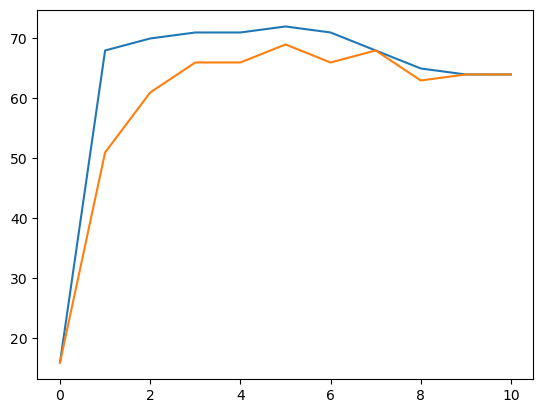

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ig_flips)
plt.plot(pred_flips)

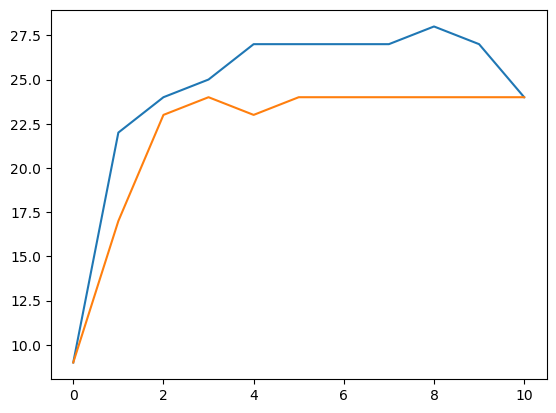

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ig_flips)
plt.plot(pred_flips)

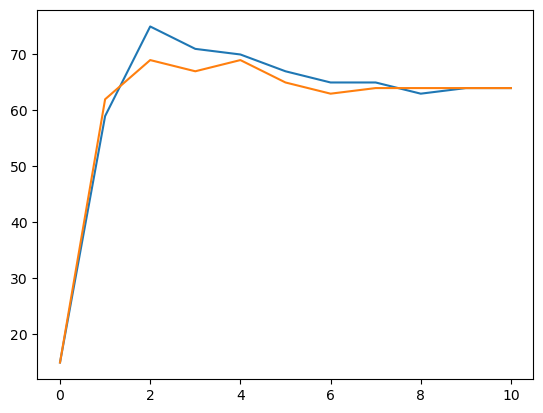

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ig_flips)
plt.plot(pred_flips)

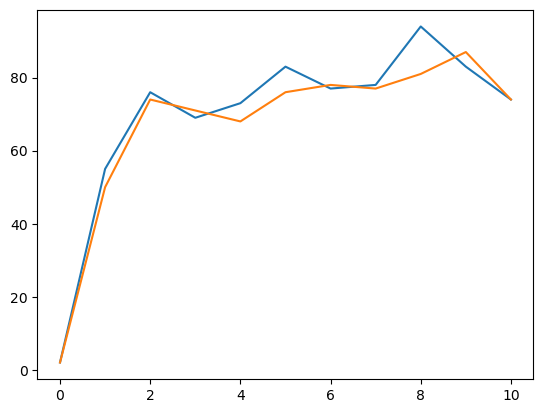

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ig_flips)
plt.plot(pred_flips)

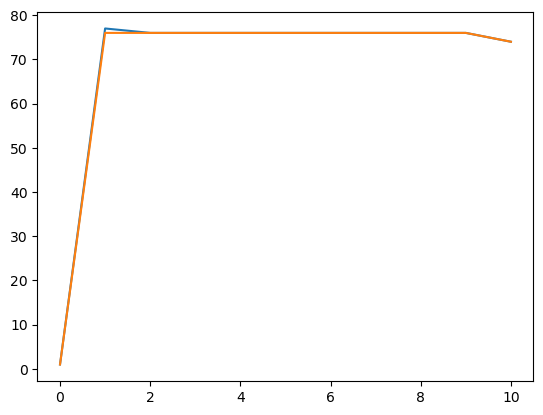

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ig_flips)
plt.plot(pred_flips)

In [23]:
list(y_test.flatten()).count(1)

76

In [95]:

archive = 'ucr'
data_p = 'G:/Meine Ablage/master thesis/code/xai-tsc'
model = "resnet_mt_nn_iter"
model_type = "resnet"
dataset = "GunPoint"
experiment = "experiment_4"
itr = 0
model = "resnet_mt_nn"
ig_link  = f'./results/ucr/{dataset}/{experiment}/{model_type}/{model}_iter_{gamma}_{itr}/resnet_ig_norm/last_model.hdf5'
#f'./results/ucr/{dataset}/experiment_1/fcn/fcn_{itr}/original/
#cam_model =keras.models.load_model(cam_link ,compile=False)
loaded_model = keras.models.load_model(ig_link ,compile=False)

pred = loaded_model.predict(x_test)[1]

5/5 [==============================] - 0s 17ms/step


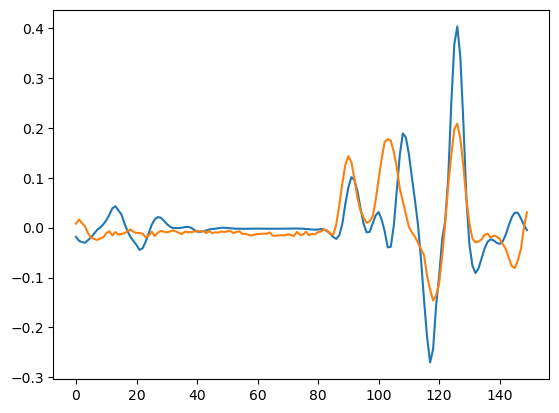

In [102]:
ts = 120
axt,ayt,axte,ayte = read_dataset(data_p, archive, dataset, 'resnet_ig_norm', 150)[dataset]
plt.plot(ayte[ts])
plt.plot(pred[ts])